## Importing the libraries

In [12]:
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

## Importing the dataset

In [13]:
from sklearn import datasets

# Load the dataset
diabetes = datasets.load_diabetes()

In [15]:
data = pd.DataFrame(diabetes.data, columns=[diabetes.feature_names])

In [17]:

print(type(diabetes['data']))

<class 'numpy.ndarray'>


In [18]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [19]:
data['measure'] = diabetes.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Text(0, 0.5, 'measure')

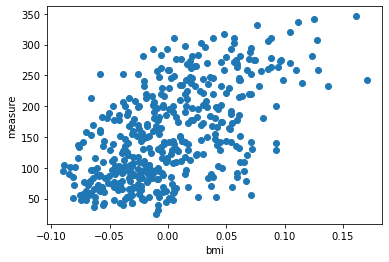

In [21]:
x = data['bmi']
y = data['measure']
plt.scatter(x, y, marker='o') 
plt.xlabel('bmi')
plt.ylabel('measure')

In [22]:
# Location of the CSV file containing the data being imported
print(diabetes['data_filename'])

C:\Users\ASUS\Documents\0.DATA_SCIENCE_CODING\.anaconda\Anaconda\lib\site-packages\sklearn\datasets\data\diabetes_data.csv.gz


In [23]:
# Location of the CSV file containing the target data being imported
print(diabetes['target_filename'])

C:\Users\ASUS\Documents\0.DATA_SCIENCE_CODING\.anaconda\Anaconda\lib\site-packages\sklearn\datasets\data\diabetes_target.csv.gz


In [24]:
# Names of the 10 groups of data
print(diabetes['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [25]:
# The 442 data points in each of the 10 groups of data, formatted as a 442x10 array
print(diabetes['data'])

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [26]:
# The target data, namely a quantitative measure of disease progression one
# year after baseline
print(diabetes['target'][:20])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.]


In [27]:
# Prepare data for linear regression¶
# X: choose all features
# y: the target variable
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [28]:
X = data.iloc[:,0:10]
X.head() 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [29]:
y = data.iloc[:,10]
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: (measure,), dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [31]:
# Print coeffients of the linear model
dict_coef =  dict(zip(diabetes.feature_names,lr.coef_)) 
dict_coef['Intercept'] = lr.intercept_  
print(dict_coef)

{'age': -52.469907754062575, 'sex': -193.51064552384324, 'bmi': 579.4827762020274, 'bp': 272.4640423392324, 's1': -504.7240137114419, 's2': 241.68441865584552, 's3': -69.73618782900486, 's4': 86.62018451049894, 's5': 721.9558022182501, 's6': 26.778870275788083, 'Intercept': 153.71914540545853}


In [32]:
# Calculate the R2 score
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
print("R2 score", r2_score)

R2 score 0.3928939845074757


In [47]:
import matplotlib.pyplot as plt
import numpy as np
ones = np.ones(len(X_train))
xtx = np.matmul(np.transpose(np.c_[ones, X_train]),np.c_[ones,X_train])
xtx_inv = np.linalg.inv(xtx)
xty = np.matmul(np.transpose(np.c_[ones, X_train]),y_train)
betas = np.matmul(xtx_inv,xty)

B1 = betas[1]
B0 = betas[0]

print('The coefficient b1 is: ', B1)
print('The intercetion b0 is: ', B0)

The coefficient b1 is:  -52.46990775406161
The intercetion b0 is:  153.71914540545853


In [ ]:

length_test = 50    
for i in range(length_test):
    y_pred.append(B0 + B1 * X_test[i])

In [ ]:
# Plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()